In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing

Loading the Dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\PRACHI.Jain01\\Downloads\\dataset\\googleplaystore.csv")

Lets take a view of the Dataset.

In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We see that there is only 1 numeric column in out dataset.

In [19]:
df = pd.DataFrame(dataset)

let us find out number of null values in our dataset

In [51]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Since there is 1 null value in Type column so we will find out which is that value.

In [20]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

We see that 0 is a type of missing value.
So we decide to remove it.


In [21]:
# We will find the index of this value.
df.index[df['Type'] == "0"].tolist()

[10472]

In [22]:
#Now we delete this row
df = df.drop(10472,axis=0)

In [24]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [25]:
df.shape

(10840, 13)

We can see that our dataset has 10840 rows and 13 columns.

Now we will find out how many Apps are Free/Paid.

Text(0, 0.5, '')

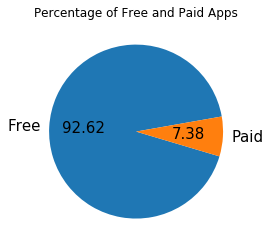

In [46]:
#
types = pd.DataFrame(df, columns = ['Type']) 
type_count = types.stack().value_counts()
ax = type_count.plot(kind = 'pie',
                              title = 'Percentage of Free and Paid Apps',
                              startangle = 10,
                     
                              autopct='%.2f',fontsize=15)
ax.set_ylabel('')



We will find out category wise number of free and paid

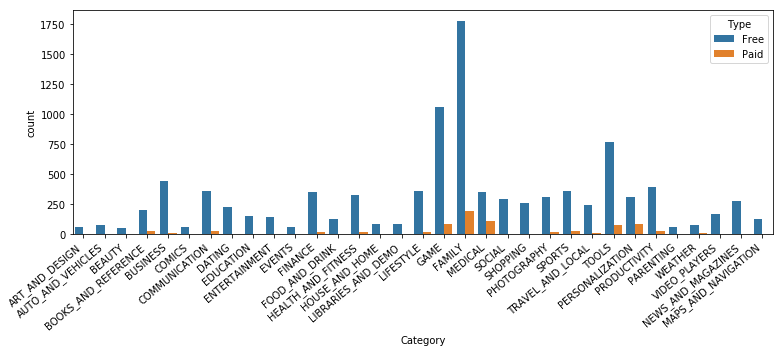

In [62]:
#Category wise free and paid apps.

plt.figure(figsize=(11,5)) 
ax = sns.countplot(x="Category", hue = "Type",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


Now Lets find out top 5 Free Apps

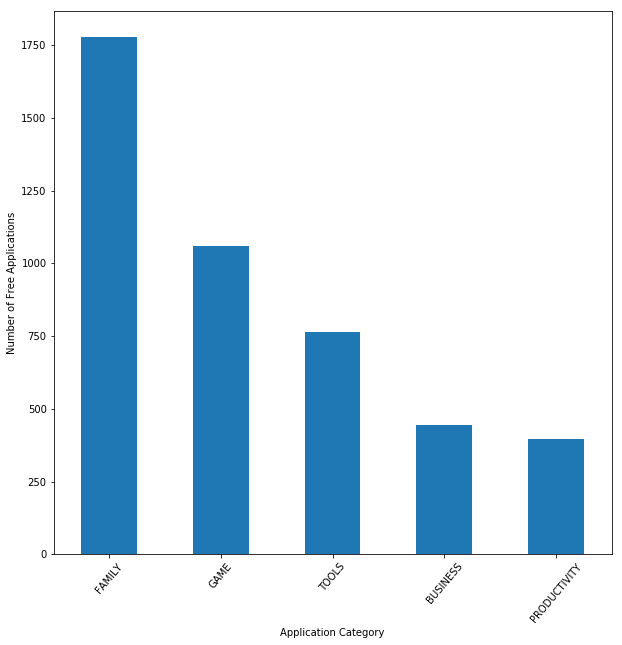

In [63]:
#top 5 free apps
Free_apps = df.loc[df['Type']=='Free']
df2 = Free_apps['Category'].value_counts().head(5)

plt.figure(figsize=(10,10))
df2.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Application Category")
plt.ylabel("Number of Free Applications")
plt.show()

We found that the Category Family has the largest number of Apps.